<a href="https://www.kaggle.com/code/mesutssmn/electricity-price-prediction?scriptVersionId=157723820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [210]:
df = pd.read_csv("/kaggle/input/electricity-price-prediction/Electricity.csv")

In [211]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [212]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [214]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [215]:
num_columns=['ForecastWindProduction','SystemLoadEA', 'SMPEA', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']

In [216]:
df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce')

In [217]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.1,571.52,346.0,2655.64,39.87


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 1536 non-null   object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          38014 non-null  object 
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [219]:
df["ForecastWindProduction"].fillna(np.mean(df["ForecastWindProduction"]), inplace=True)
df["SystemLoadEA"].fillna(np.mean(df["SystemLoadEA"]), inplace=True)
df["SMPEA"].fillna(np.mean(df["SMPEA"]), inplace=True)
df["ORKWindspeed"].fillna(np.mean(df["ORKWindspeed"]), inplace=True)
df["CO2Intensity"].fillna(np.mean(df["CO2Intensity"]), inplace=True)
df["ActualWindProduction"].fillna(np.mean(df["ActualWindProduction"]), inplace=True)
df["SystemLoadEP2"].fillna(np.mean(df["SystemLoadEP2"]), inplace=True)
df["SMPEP2"].fillna(np.mean(df["SMPEP2"]), inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 1536 non-null   object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  SMPEA                   38014 non-null  float64
 12  ORKTemperature          38014 non-null  object 
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

In [221]:
df.isna().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [269]:
#sns.pairplot(df)

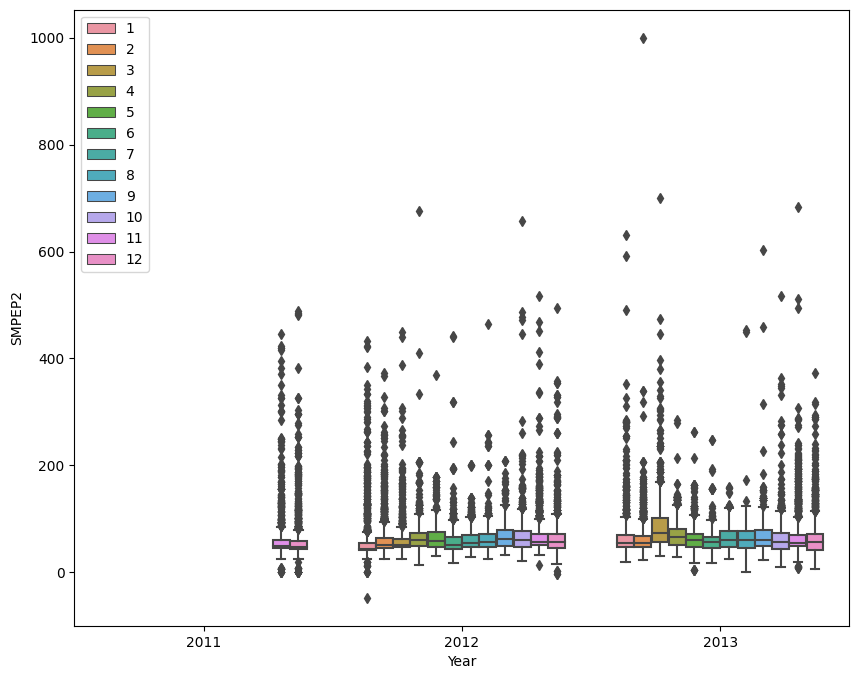

In [206]:
plt.figure(figsize=(10,8))
sns.boxplot(df, x="Year", y="SMPEP2", hue="Month");
plt.legend()
plt.show()

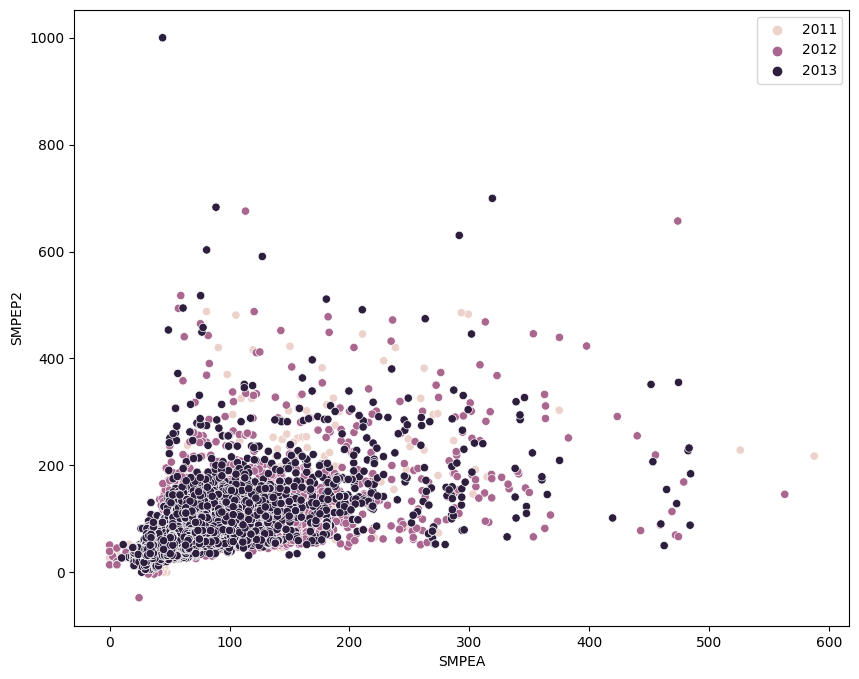

In [207]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x="SMPEA", y="SMPEP2", hue="Year");
plt.legend()
plt.show()

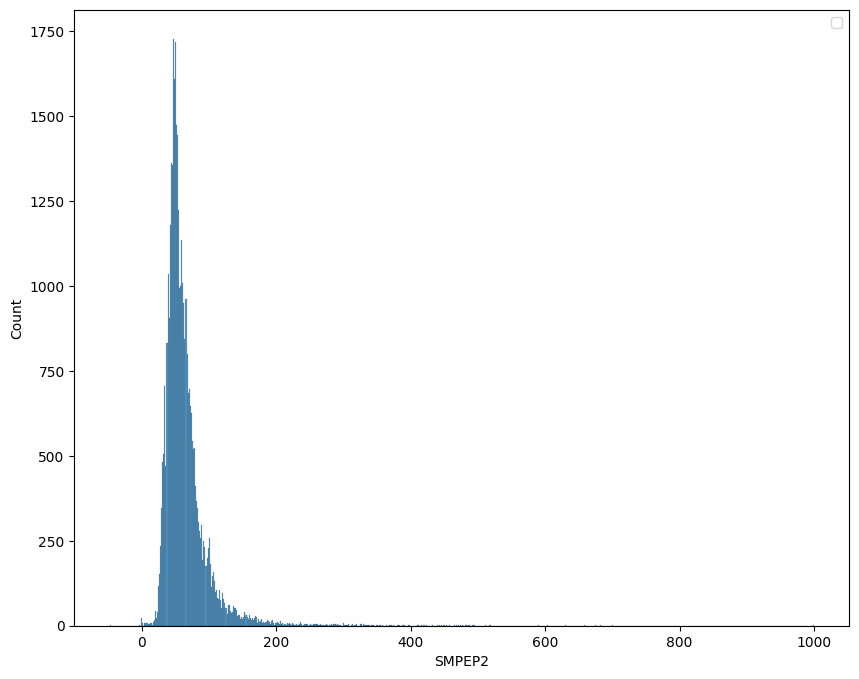

In [105]:
plt.figure(figsize=(10,8))
sns.histplot(df, x="SMPEP2");
plt.legend()
plt.show()

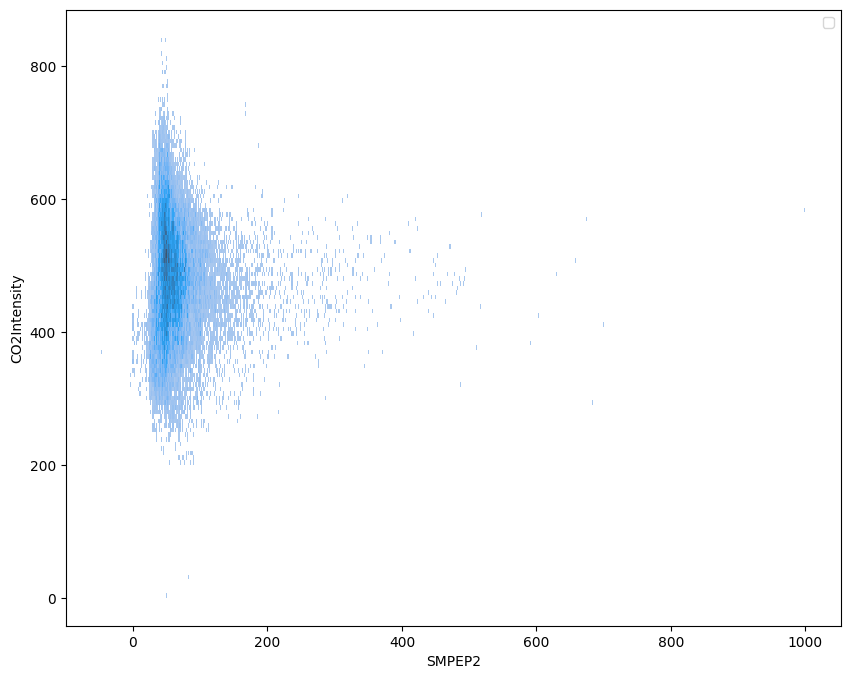

In [106]:
plt.figure(figsize=(10,8))
sns.histplot(df, x="SMPEP2", y="CO2Intensity");
plt.legend()
plt.show()

In [107]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

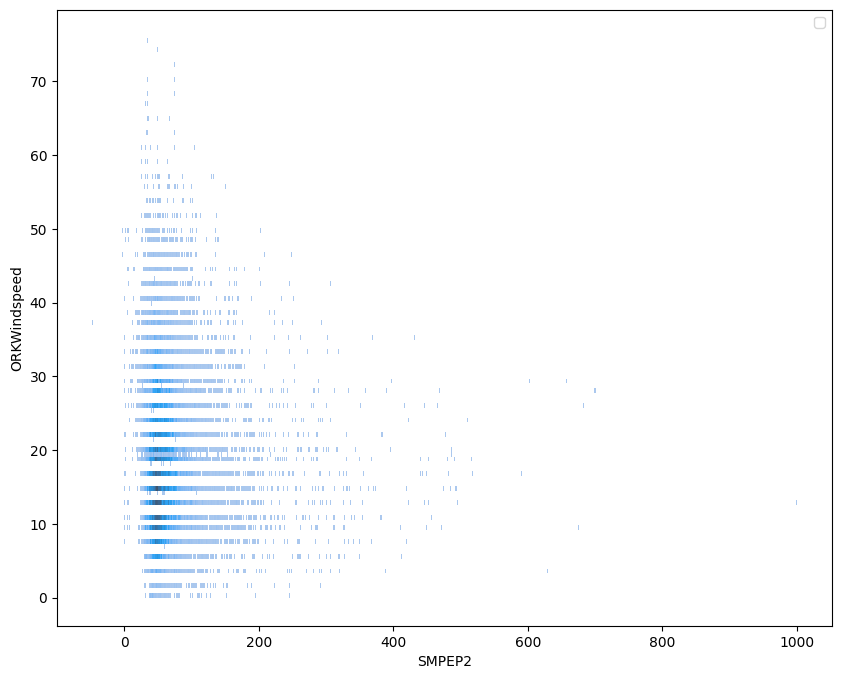

In [108]:
plt.figure(figsize=(10,8))
sns.histplot(df, x="SMPEP2", y="ORKWindspeed");
plt.legend()
plt.show()

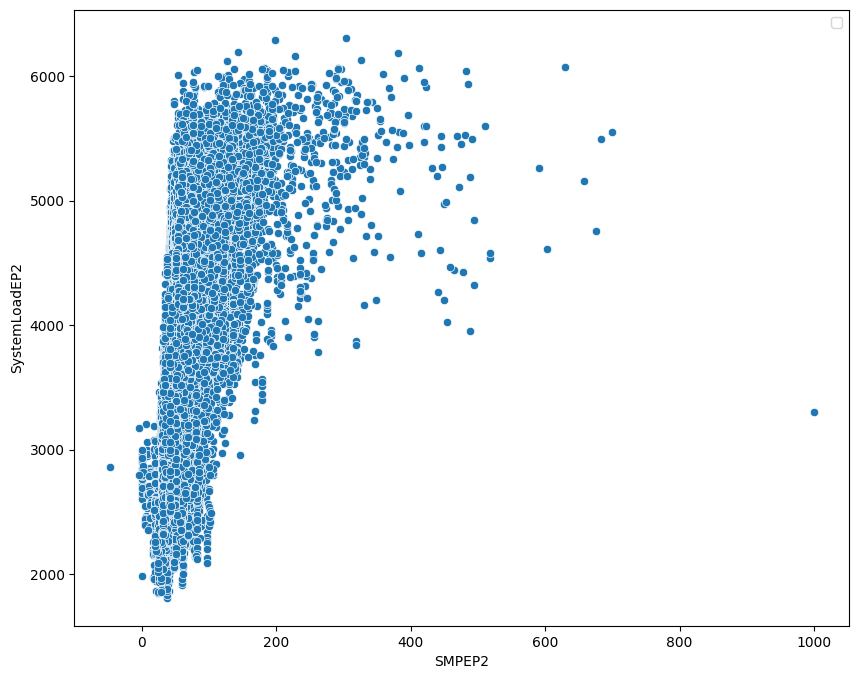

In [124]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x="SMPEP2", y="SystemLoadEP2");
plt.legend()
plt.show()

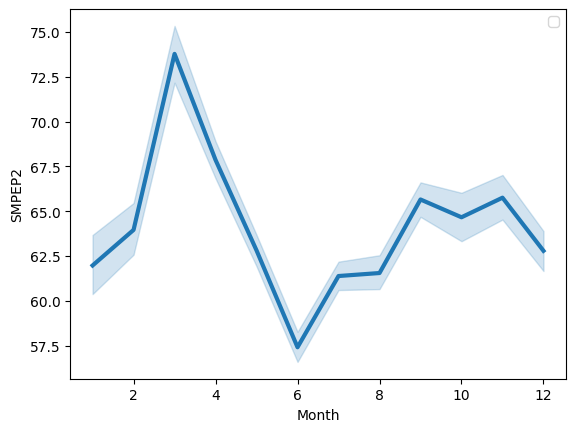

In [119]:
sns.lineplot(df,x='Month',y='SMPEP2', linewidth=3)
plt.legend()
plt.show()

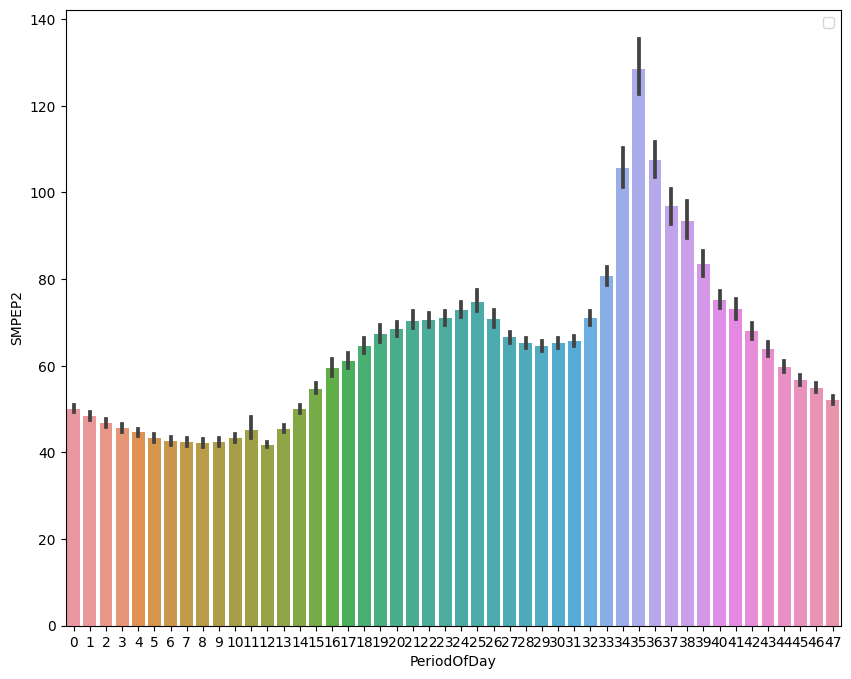

In [143]:
plt.figure(figsize=(10,8))
sns.barplot(df,x='PeriodOfDay',y='SMPEP2')
plt.legend()
plt.show()

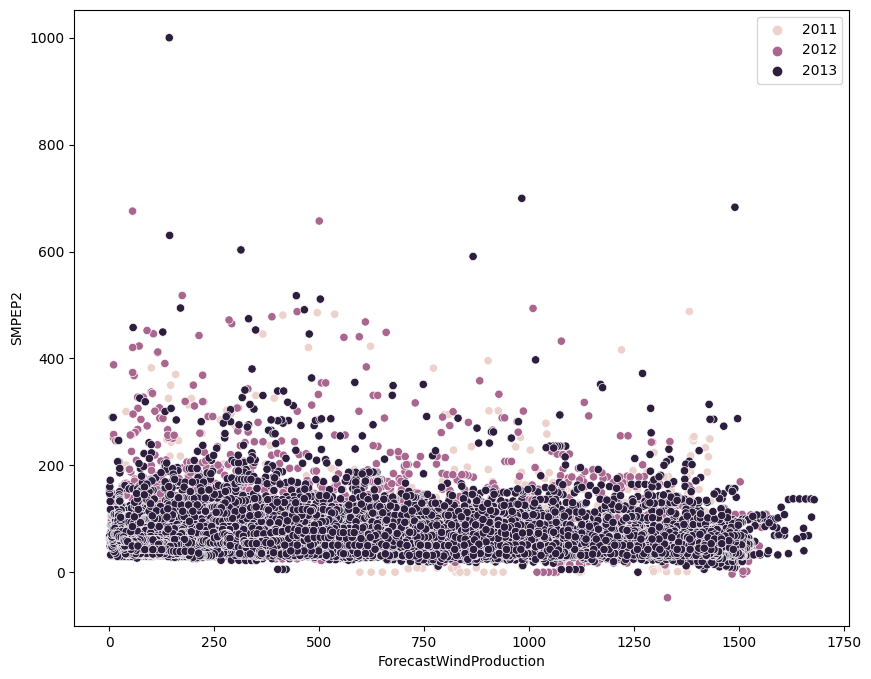

In [165]:
plt.figure(figsize=(10,8))
sns.scatterplot(df,x="ForecastWindProduction",y='SMPEP2', hue="Year")
plt.legend()
plt.show()

In [222]:
df.drop(["DateTime", "Holiday", "HolidayFlag", "DayOfWeek", "WeekOfYear", "Day", "Month", "Year", "PeriodOfDay","ORKTemperature"], axis = 1, inplace = True)

<Axes: >

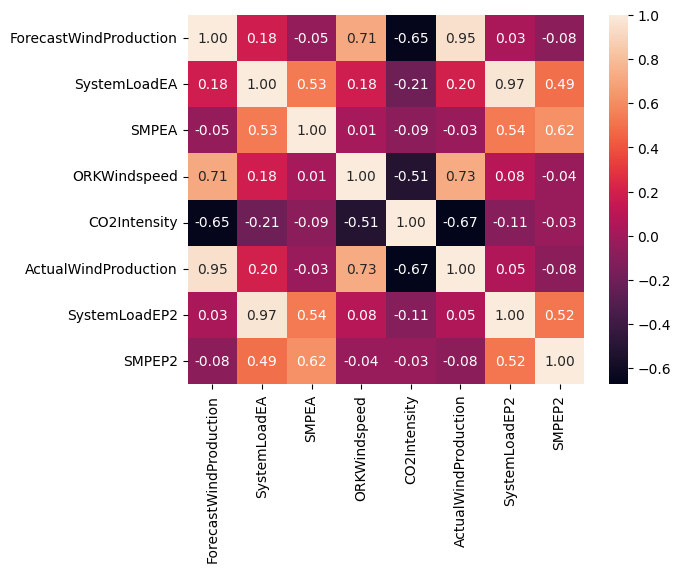

In [223]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [224]:
y = df["SMPEP2"]
X = df.drop(["SMPEP2"], axis = 1)

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [228]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, train_size=0.5)

In [239]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print({"Test Score:":lr.score(X_test, y_test),"Val Score":lr.score(X_val, y_val)})

{'Test Score:': 0.3965373914561626, 'Val Score': 0.44422284488082553}


In [230]:
lb = linear_model.BayesianRidge(n_iter = 60)
lb.fit(X_train, y_train)
print({"Test Score:":lb.score(X_test, y_test),"Val Score":lb.score(X_val, y_val)})

{'Test Score:': 0.3965455715070847, 'Val Score': 0.44423200208794456}


In [231]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print({"Test Score:":rf.score(X_test, y_test),"Val Score":rf.score(X_val, y_val)})

{'Test Score:': 0.5348919644085077, 'Val Score': 0.5172797595832062}


In [240]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print({"Test Score:":xgb.score(X_test, y_test),"Val Score":xgb.score(X_val, y_val)})

{'Test Score:': 0.4520548480895633, 'Val Score': 0.4496961301269471}


In [241]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
print({"Test Score:":lgb.score(X_test, y_test),"Val Score":lgb.score(X_val, y_val)})

{'Test Score:': 0.45787478103582635, 'Val Score': 0.4772921103784076}


In [25]:
#X=np.asarray(X_train).astype(np.float32)
#Y=np.asarray(y_train).astype(np.float32)

In [232]:
X_train.shape

(30411, 7)

In [233]:
model = tf.keras.Sequential()

input_layer = tf.keras.layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation="relu")
model.add(input_layer)

# BatchNormalization katmanını ekleyin
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10000, activation="relu"))
model.add(tf.keras.layers.Dense(5000, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1000, activation="relu"))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation="linear"))

model.summary()
model.compile(optimizer="adam", loss="mse")

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 batch_normalization (Batch  (None, 7)                 28        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 10000)             80000     
                                                                 
 dense_2 (Dense)             (None, 5000)              50005000  
                                                                 
 dropout (Dropout)           (None, 5000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              5001000   
                                                        

In [234]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    epochs=100, verbose=1, batch_size=1000)

Epoch 1/100
31/31 [==============================] - 12s 118ms/step - loss: 2040.6532 - val_loss: 34535.4062
Epoch 2/100
31/31 [==============================] - 3s 98ms/step - loss: 1312.5140 - val_loss: 10506.5664
Epoch 3/100
31/31 [==============================] - 3s 97ms/step - loss: 1271.1215 - val_loss: 4041.3630
Epoch 4/100
31/31 [==============================] - 3s 97ms/step - loss: 1207.0034 - val_loss: 2588.0591
Epoch 5/100
31/31 [==============================] - 3s 98ms/step - loss: 1159.2312 - val_loss: 1424.0529
Epoch 6/100
31/31 [==============================] - 3s 98ms/step - loss: 1186.5703 - val_loss: 1423.9397
Epoch 7/100
31/31 [==============================] - 3s 90ms/step - loss: 1112.9301 - val_loss: 4069.0647
Epoch 8/100
31/31 [==============================] - 3s 89ms/step - loss: 1080.9392 - val_loss: 4337.3135
Epoch 9/100
31/31 [==============================] - 3s 89ms/step - loss: 1110.2960 - val_loss: 3274.0837
Epoch 10/100
31/31 [======================

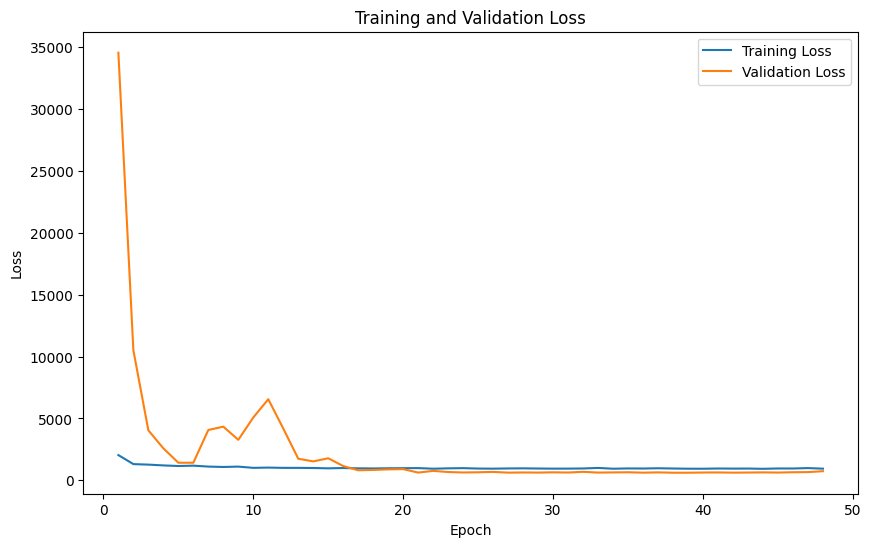

In [262]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1) 

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [264]:
y_pred = model.predict(X_test)
y_pred[:10]

119/119 [==============================] - 0s 3ms/step


array([[77.74874 ],
       [42.874332],
       [69.09222 ],
       [69.461685],
       [57.32163 ],
       [34.33385 ],
       [55.598568],
       [96.81324 ],
       [80.47187 ],
       [56.850063]], dtype=float32)

In [265]:
y_pred.shape

(3801, 1)

In [266]:
y_test_df = pd.DataFrame({'Actual_Value': y_test.values})
y_pred_df = pd.DataFrame({'Predicted_Value': y_pred.flatten()})
result_df = pd.concat([y_test_df, y_pred_df], axis=1)
result_df


,Actual_Value,Predicted_Value
0,72.57,77.748741
1,33.97,42.874332
2,63.02,69.092216
3,52.69,69.461685
4,50.64,57.321629
...,...,...
3796,85.84,62.078419
3797,66.41,81.687790
3798,51.24,59.503872
3799,28.18,37.087460


In [267]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

697.2511432024125

In [268]:
model.evaluate(X_test, y_test)

119/119 [==============================] - 0s 4ms/step - loss: 697.2512


697.251220703125